# Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Downlaod Files:

* https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [96]:
#Import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle

#Importing Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder, PowerTransformer, StandardScaler

#Import Zscore
from scipy.stats import zscore

#Import Library to Balance Dataset.
from imblearn.over_sampling import SMOTE

#Import PCA
from sklearn.decomposition import PCA

#Import Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Importing Evaluation metrics for Classification models
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, train_test_split

#Importing GridSearchCV to Tune model.
from sklearn.model_selection import GridSearchCV

In [2]:
#Read dataset
data = pd.read_csv(r"C:\Users\singh\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

* We have 1470 rows and 35 columns in the above dataset.

### Problem Solution:

As per problem statement we need to analyze the attrition of the employees so Attrition column is our target variable which contains only Yes and No data so it is a classification problem. I am going to build few classification models and will compare them basis on their metrics and choose one best model to predict Attrition.

In [5]:
#Checking information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* Attrition, Business Travel, Deparment, Education Field, Gender, Job role, Marital Status, Over18, Over time columns contain obejct type data and rest columns are in integer.

In [6]:
#Checking datatypes
data.dtypes.value_counts()

int64     26
object     9
dtype: int64

* We have 26 interger and 9 object type columns present in the dataset.

In [7]:
#Checking unique values of the dataset
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

* There are different unique numbers present in the dataset.

In [8]:
#Checking Attrition count of the employees
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

* In this dataset the difference between Attrition Yes and No count is huge from this we can say that the dataset is imbalanced so later we will fix it using SMOTE.

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
#Checking Unique values of Business Travel
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

* Column Business Travel contains three different types of data 'Travel_Rarely', 'Travel_Frequently' and 'Non_Travel'.

In [11]:
#Checking Unique values of department
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

* Here is this dataset we have data from 3 different departments Sales, Research & Development and Human Resources.

In [12]:
#Checking unique values of Education Field
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

* We can observe employees belongs to various types of education field.

In [13]:
#Checking unique value of Gender
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
#Removing duplicates from the dataset.
data.drop_duplicates(keep = 'first', inplace = True)

In [15]:
data.shape

(1470, 35)

In [16]:
#Checking for null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

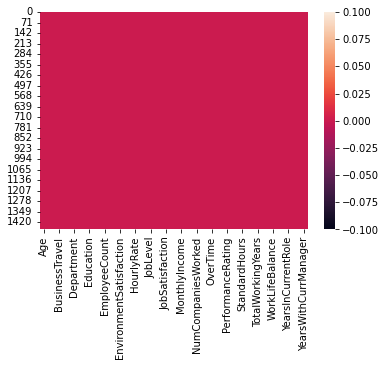

In [17]:
#Visualizing null values if present in the dataset
sns.heatmap(data.isnull())
plt.show()

* No null values present in the dataset all 1470 rows and 35 columns contains data.

# Univariate Analysis

In [18]:
#Checking columns of the dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

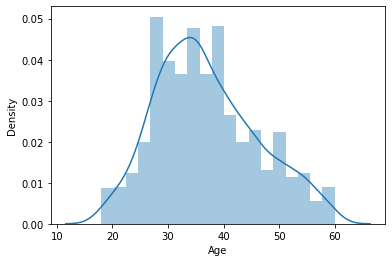

In [19]:
#Checking dtribution of Age
sns.distplot(data['Age'])
plt.show()

In [20]:
#Checking mean of Age
data['Age'].mean()

36.923809523809524

* The average of age of employees are between 36 to 40 years where mean is 36.

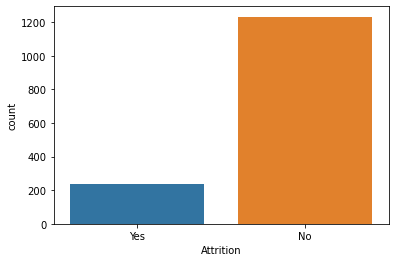

In [21]:
#Checking count of Attrition
sns.countplot(data['Attrition'])
plt.show()

* Attrition No count is higher than Yes count hence we can conclude that the dataset is imbalanced.

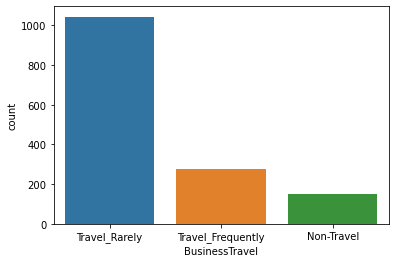

In [22]:
#Checking count of Business Travel
sns.countplot(data['BusinessTravel'])
plt.show()

* Travel_Rarely count are more followed by Travel_Frequently Business Travel and Non_Travel.

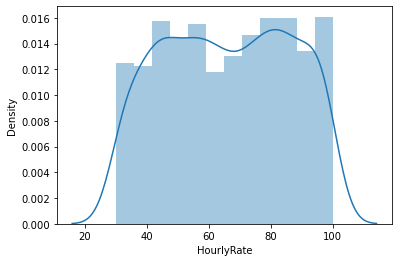

In [23]:
#Checking distribution of hourly rate
sns.distplot(data['HourlyRate'])
plt.show()

In [24]:
#Checking mean, min and max of Hourly Rate
print('Mean of Hourly Rate', data['HourlyRate'].mean())
print('Min of Hourly Rate', data['HourlyRate'].min())
print('Max of Hourly Rate', data['HourlyRate'].max())

Mean of Hourly Rate 65.89115646258503
Min of Hourly Rate 30
Max of Hourly Rate 100


* The average Hourly Rate is 66, min is 30 and maximum hourly rate is 100.

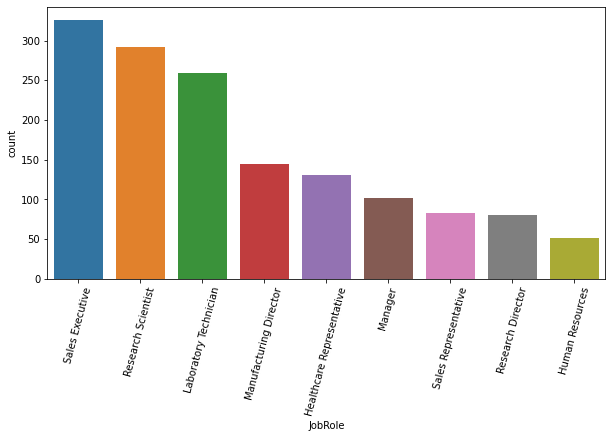

In [25]:
#Checking counts of Job role
plt.figure(figsize = (10,5))
sns.countplot(data['JobRole'])
plt.xticks(rotation = 75)
plt.show()

* Maximum Job Role is for Sales Executives and least is for Human Resources.

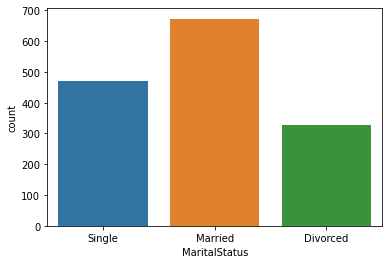

In [26]:
#Checking counts of Marital Status
sns.countplot(data['MaritalStatus'])
plt.show()

* Married employee count are more followed by Single and Divorced.

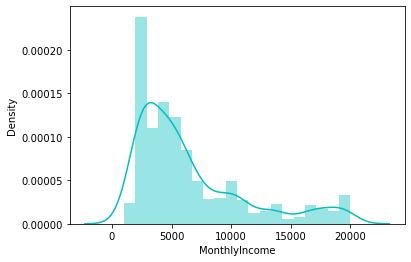

In [27]:
#Check monthly income of employees
sns.distplot(data['MonthlyIncome'], color = 'c')
plt.show()

In [28]:
#Checking mean, min and max of monthly income of the employees
print('Mean of Monthly income', data['MonthlyIncome'].mean())
print('Min of Monthly income', data['MonthlyIncome'].min())
print('Max of Monthly income', data['MonthlyIncome'].max())

Mean of Monthly income 6502.931292517007
Min of Monthly income 1009
Max of Monthly income 19999


* The Average monthly income of an employee is 6503, min is 1009 and maximum income is 19999.

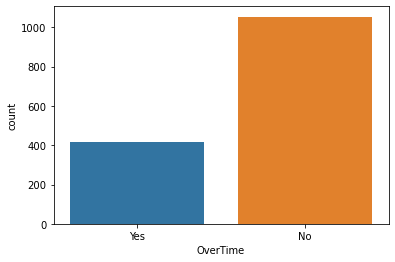

In [29]:
#Checking count of overtime employees
sns.countplot(data['OverTime'])
plt.show()

* The count of the employee who opt for Overtime is very less.

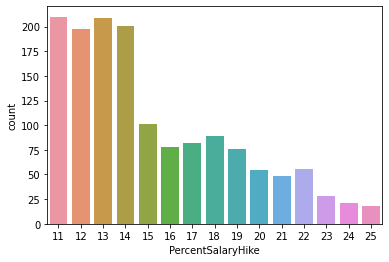

In [30]:
#Checking the percentage of salary hike for employees
sns.countplot(data['PercentSalaryHike'])
plt.show()

* The Average salary hike is between 11% to 14% per employee.

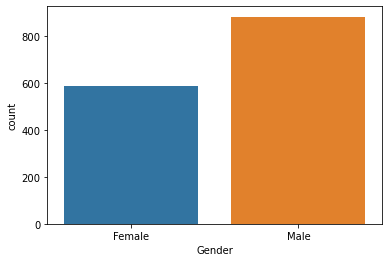

In [31]:
#Checking count of Gender
sns.countplot(data['Gender'])
plt.show()

* The count of Male employees are more than Female employees.

# Bivariate Analysis

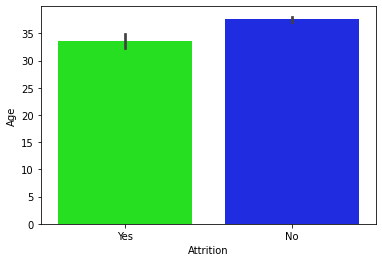

In [32]:
#Checking Attrition by Age
sns.barplot('Attrition', 'Age', data = data, palette = 'hsv')
plt.show()

* Not getting any clear idea which age goup choose to leave company more however one point I can notice that age over 36 years tend to settle and don't move towards Attrition.

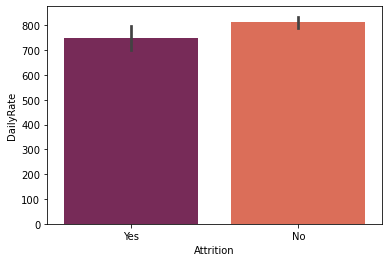

In [33]:
#Checking Attrition by daily rate
sns.barplot('Attrition', 'DailyRate', data = data, palette = 'rocket')
plt.show()

* We can see that employees who are paid arount 750 are more in attrition and after that no more attrition hence we can conclude that if emolyees are paid more then the Attrition count will be less.

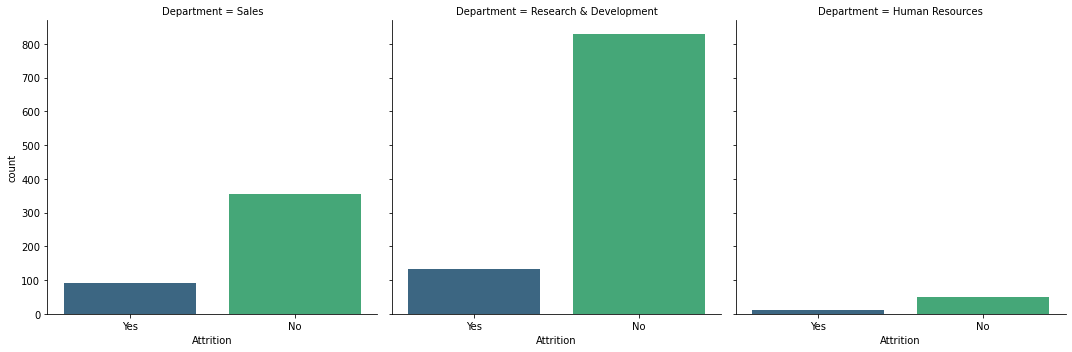

In [34]:
#Checking Attrition By Department
sns.catplot(x = 'Attrition', col = 'Department', data = data, kind = 'count', palette = 'viridis')
plt.show()

* Research & Development deparment has the highest Attrition count followed by Sales and Human Resources.

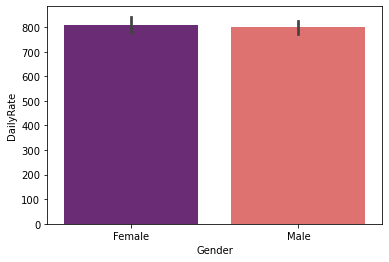

In [35]:
#Checking daily rate by gender
sns.barplot(x = 'Gender', y = 'DailyRate', data = data, palette = 'magma')
plt.show()

* Noy seeing much difference in daily rates for Male and Female however a little more pay is given to the Female employees than Male.

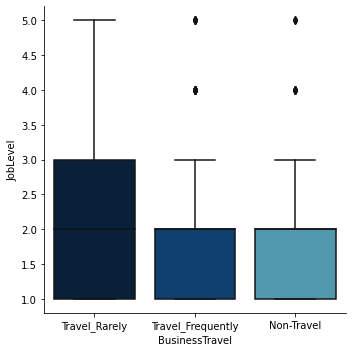

In [36]:
#Visualizing Job level and Business Travels
sns.catplot('BusinessTravel', 'JobLevel', data = data, kind = 'box', palette = 'ocean')
plt.show()

* Employess in job level 2 are the frequent Business Travelers in job level 2 we also have employees who Travel rarely or does not travel at all. But in job level 3 employees do travel by that is rare.

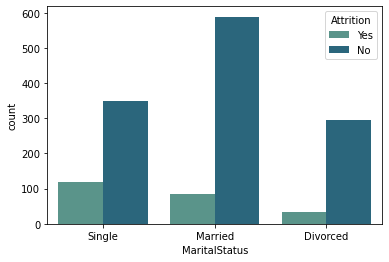

In [37]:
#Visualizing Attrition by Marital Status.
sns.countplot(x = data['MaritalStatus'], hue = data['Attrition'], data = data, palette = 'crest')
plt.show()

* Married employee's Attrition count is more followed by Single and Divorced.

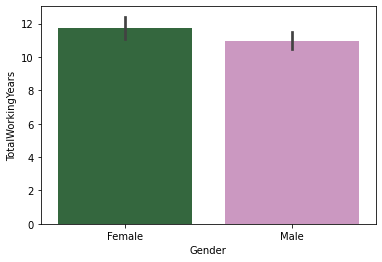

In [38]:
#Visualizing Total working years by Gender
sns.barplot('Gender', 'TotalWorkingYears', data = data, palette = 'cubehelix')
plt.show()

* Female employees shows more Total Working Years than male.

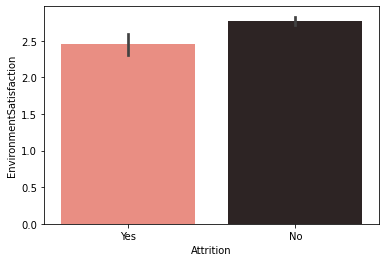

In [39]:
#Visualizing Attrition by Environment Statisfaction
sns.barplot('Attrition', 'EnvironmentSatisfaction', data = data, palette = 'dark:salmon_r')
plt.show()

* Attrition can be seen when Environment Satisfaction rate is 2.4 so if this will increase then the Attrition will be less.

# Multivariate Analysis

<Figure size 432x216 with 0 Axes>

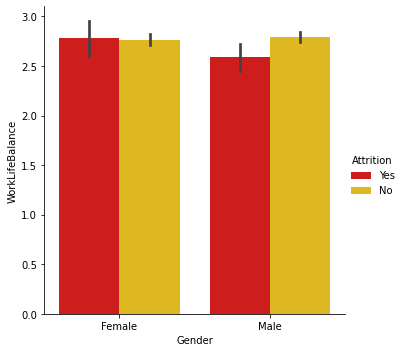

In [40]:
#Visulaizing Attrition, by gender and WorkLifeBalance
plt.figure(figsize = (6,3))
sns.catplot(x = "Gender", y = "WorkLifeBalance", hue = "Attrition", kind = "bar", data = data, palette = "hot")
plt.show()

* The female employees with bad WorkLifeBalance facing more attrition than male. However attrition is also seen for male employees due to WorkLifeBalance so if this can be reduce then the Attrition will be less.

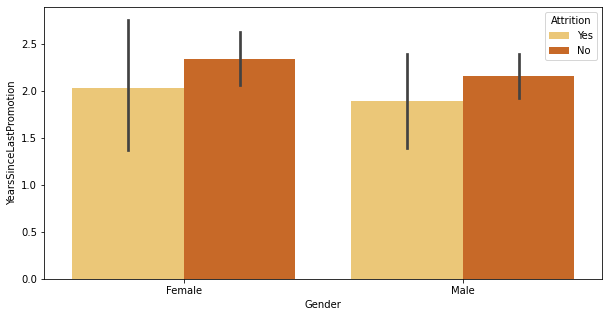

In [41]:
#Visualizing Attrition by Gender and Years Since Last Promotion
plt.figure(figsize = (10,5))
sns.barplot(x = 'Gender', y = 'YearsSinceLastPromotion', hue = 'Attrition', data = data, palette = 'YlOrBr')
plt.show()

* From the above plot I can conclude that if a employee is not getting promotion for 1.9 years from the joining then the chances of that employee's attrition is very high.

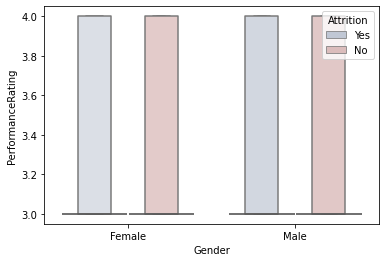

In [42]:
#Visualizing attrition by Gender and Performance
sns.boxenplot(data['Gender'], data['PerformanceRating'], data = data, hue = data['Attrition'], palette = 'vlag')
plt.show()

* Here the performance rating for Female and male are same so is for Attriton.

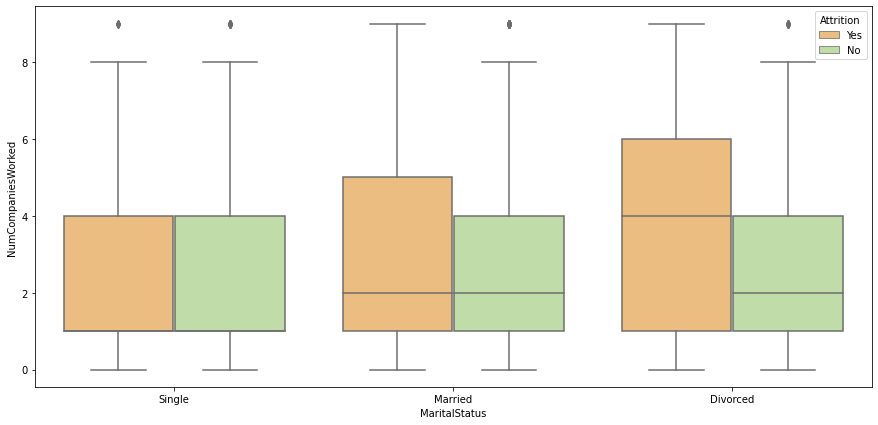

In [43]:
#Visualizing Attrition by Marital status and number of companies worked.
plt.figure(figsize = (15,7))
sns.boxplot('MaritalStatus', 'NumCompaniesWorked', hue = 'Attrition', data = data, palette = 'Spectral')
plt.show()

* Employees divorced have more number of Attrition followed by Married and Single.
* Single employee's Attrition and non-Attrition counts are equal.
* Employees divorced and married have more work experinece in different companies and single employees.

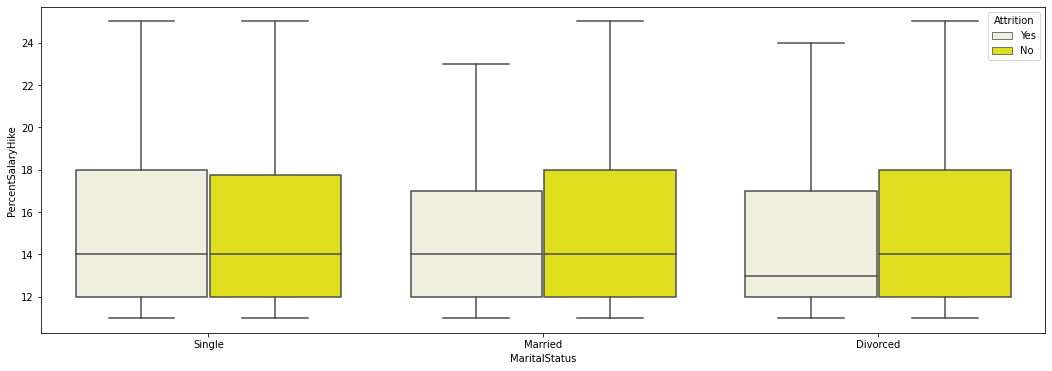

In [44]:
#Visualizing Attrition by Marital Status and Percentage Salary hike
plt.figure(figsize = (18, 6))
sns.boxplot('MaritalStatus', 'PercentSalaryHike', hue = 'Attrition', data = data, color = 'yellow')
plt.show()

* Here we can see that the in case of Single the Attrition is more as compared to Married and Divorced. This may because Single don't want to settle to less, they want to seek organization which has more Salary hike.

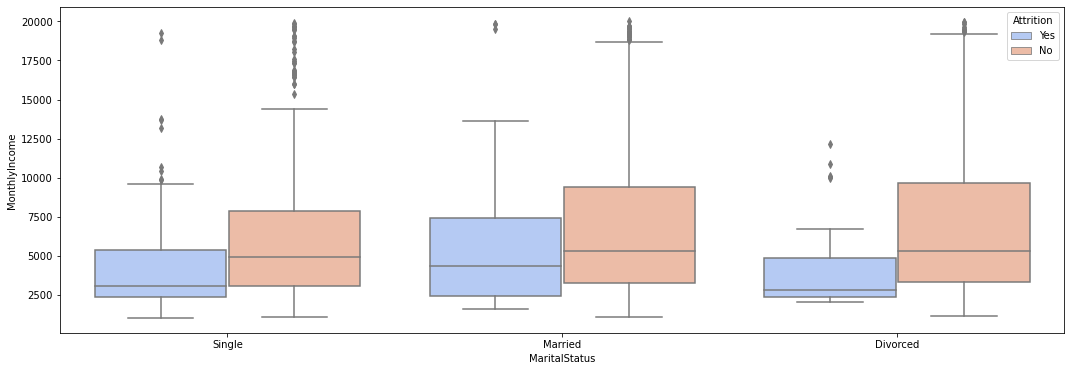

In [45]:
#Visualizing Attrition by Marital Status and Monthly Income
plt.figure(figsize = (18, 6))
sns.boxplot('MaritalStatus', 'MonthlyIncome', hue = 'Attrition', data = data, palette = 'coolwarm')
plt.show()

* Here we can observe that incase of Monthly income the attrition is more for Married employees than Single and Divorced, this may be because married people have more expenses.

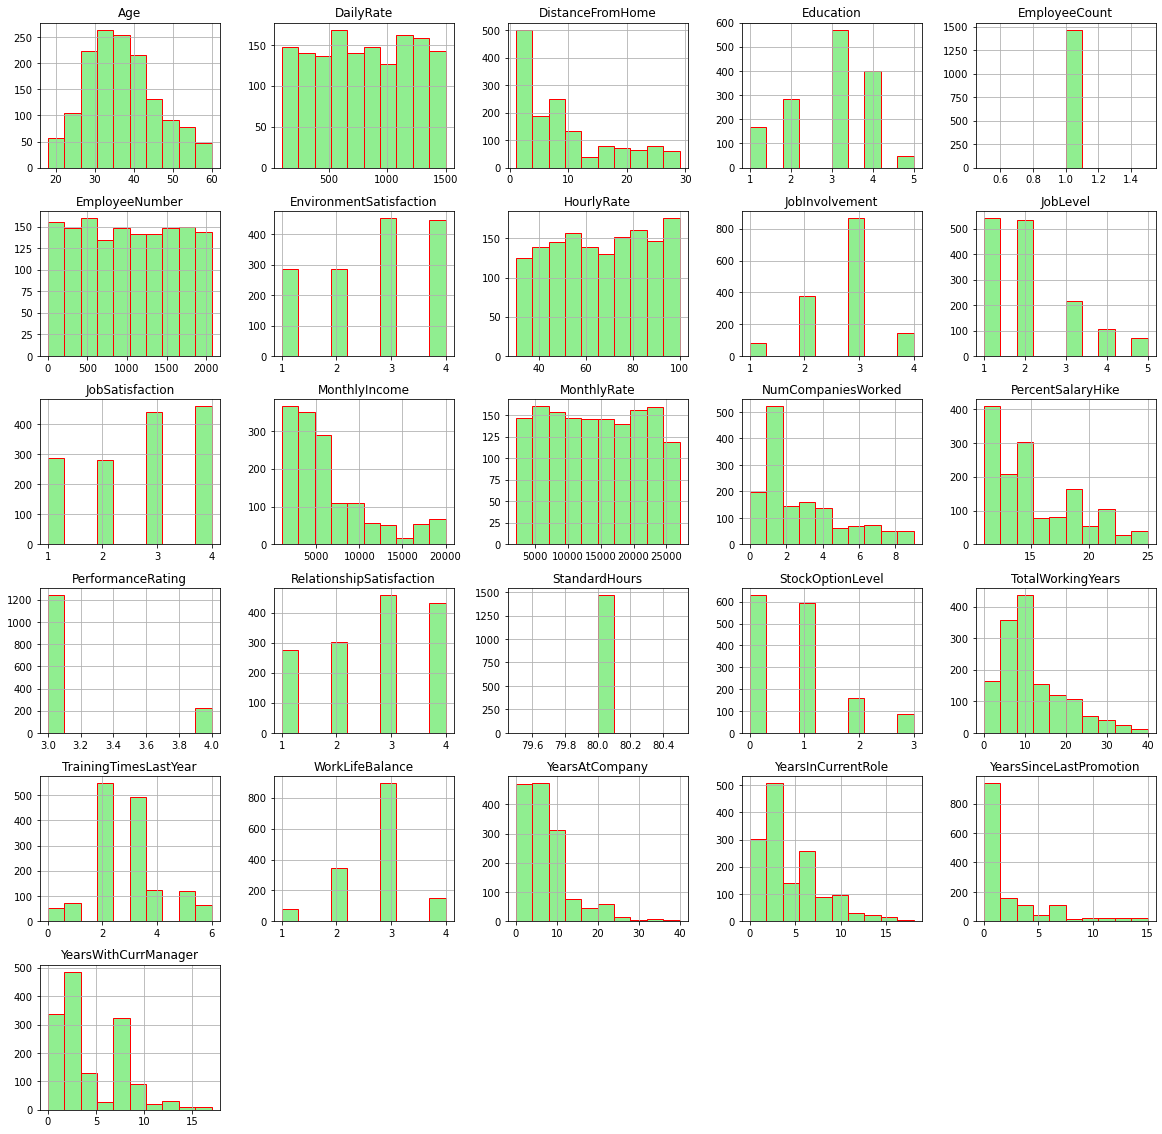

In [46]:
#Ploting Histogram
data.hist(bins = 10, figsize = (20,20), color = "lightgreen", ec = "red")
plt.show()

* Most of the columns are skewed will treat them in later process.

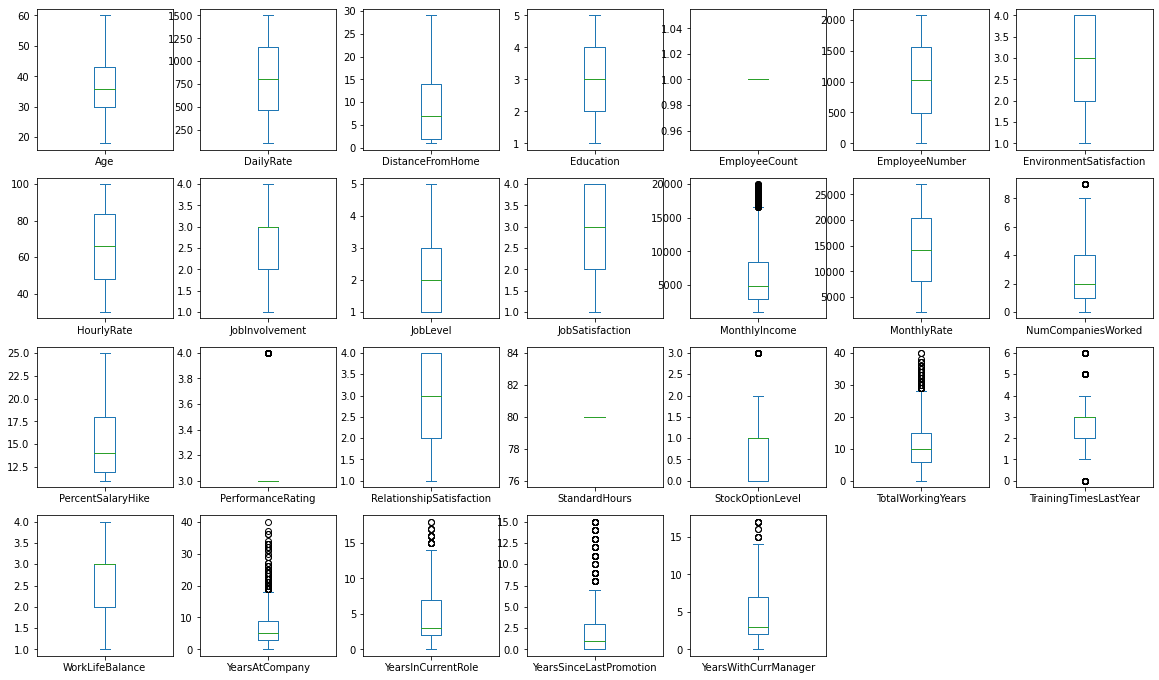

In [47]:
#Ploting box plot
data.plot(kind = 'box', subplots = True, layout = (5,7), figsize = (20,15))
plt.show()

* Outliers present in MonthlyIncome, Performance Rating, StockOptionLevel, TotalWorkingYears, TrainingTimeLastYear, YearsAtCompany, YearsInCorrentRole, YearsSinceLastPromotion, YearWithCurrManager which needs to be corrected.

In [48]:
#Will Delete irrelivent columns
data.drop(columns = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1, inplace = True)

In [49]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Encoding Categorical columns to integer

In [50]:
#Will use Label Encoder to convert all catgorical columns to integer
lab_enc = LabelEncoder()

for i in data[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'OverTime', 'JobRole', 'MaritalStatus']]:
    data[i] = lab_enc.fit_transform(data[i])

In [51]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


# Correlation

In [52]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


In [53]:
#Checking correlation with target
data.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

* I can see many columns have negative correlation with target variable Attrition.

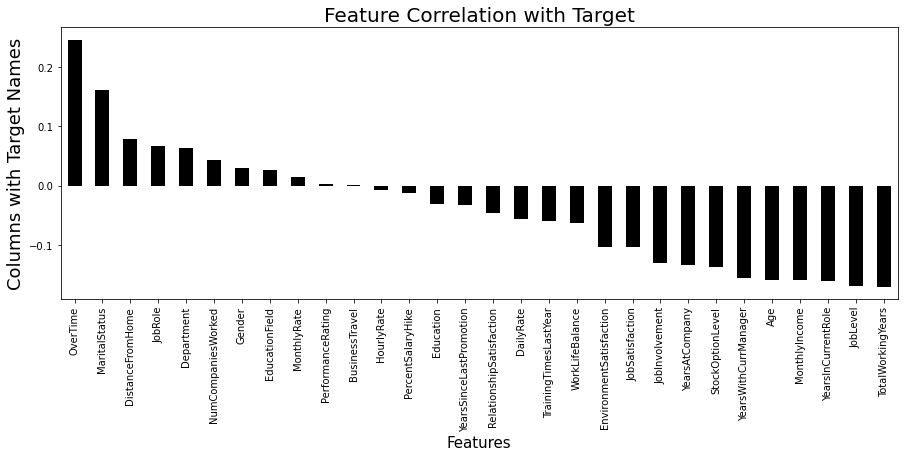

In [54]:
#Checking columns which are positively and negatively correlated.
plt.figure(figsize = (15,5))
data.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind = 'bar', color = 'black')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Columns with Target Names', fontsize = 18)
plt.title('Feature Correlation with Target', fontsize = 20)
plt.show()

* Over Time and Marital status have strong positive correlation with target.
* Total Working Years and Job level have strong negative relationship with target variable.

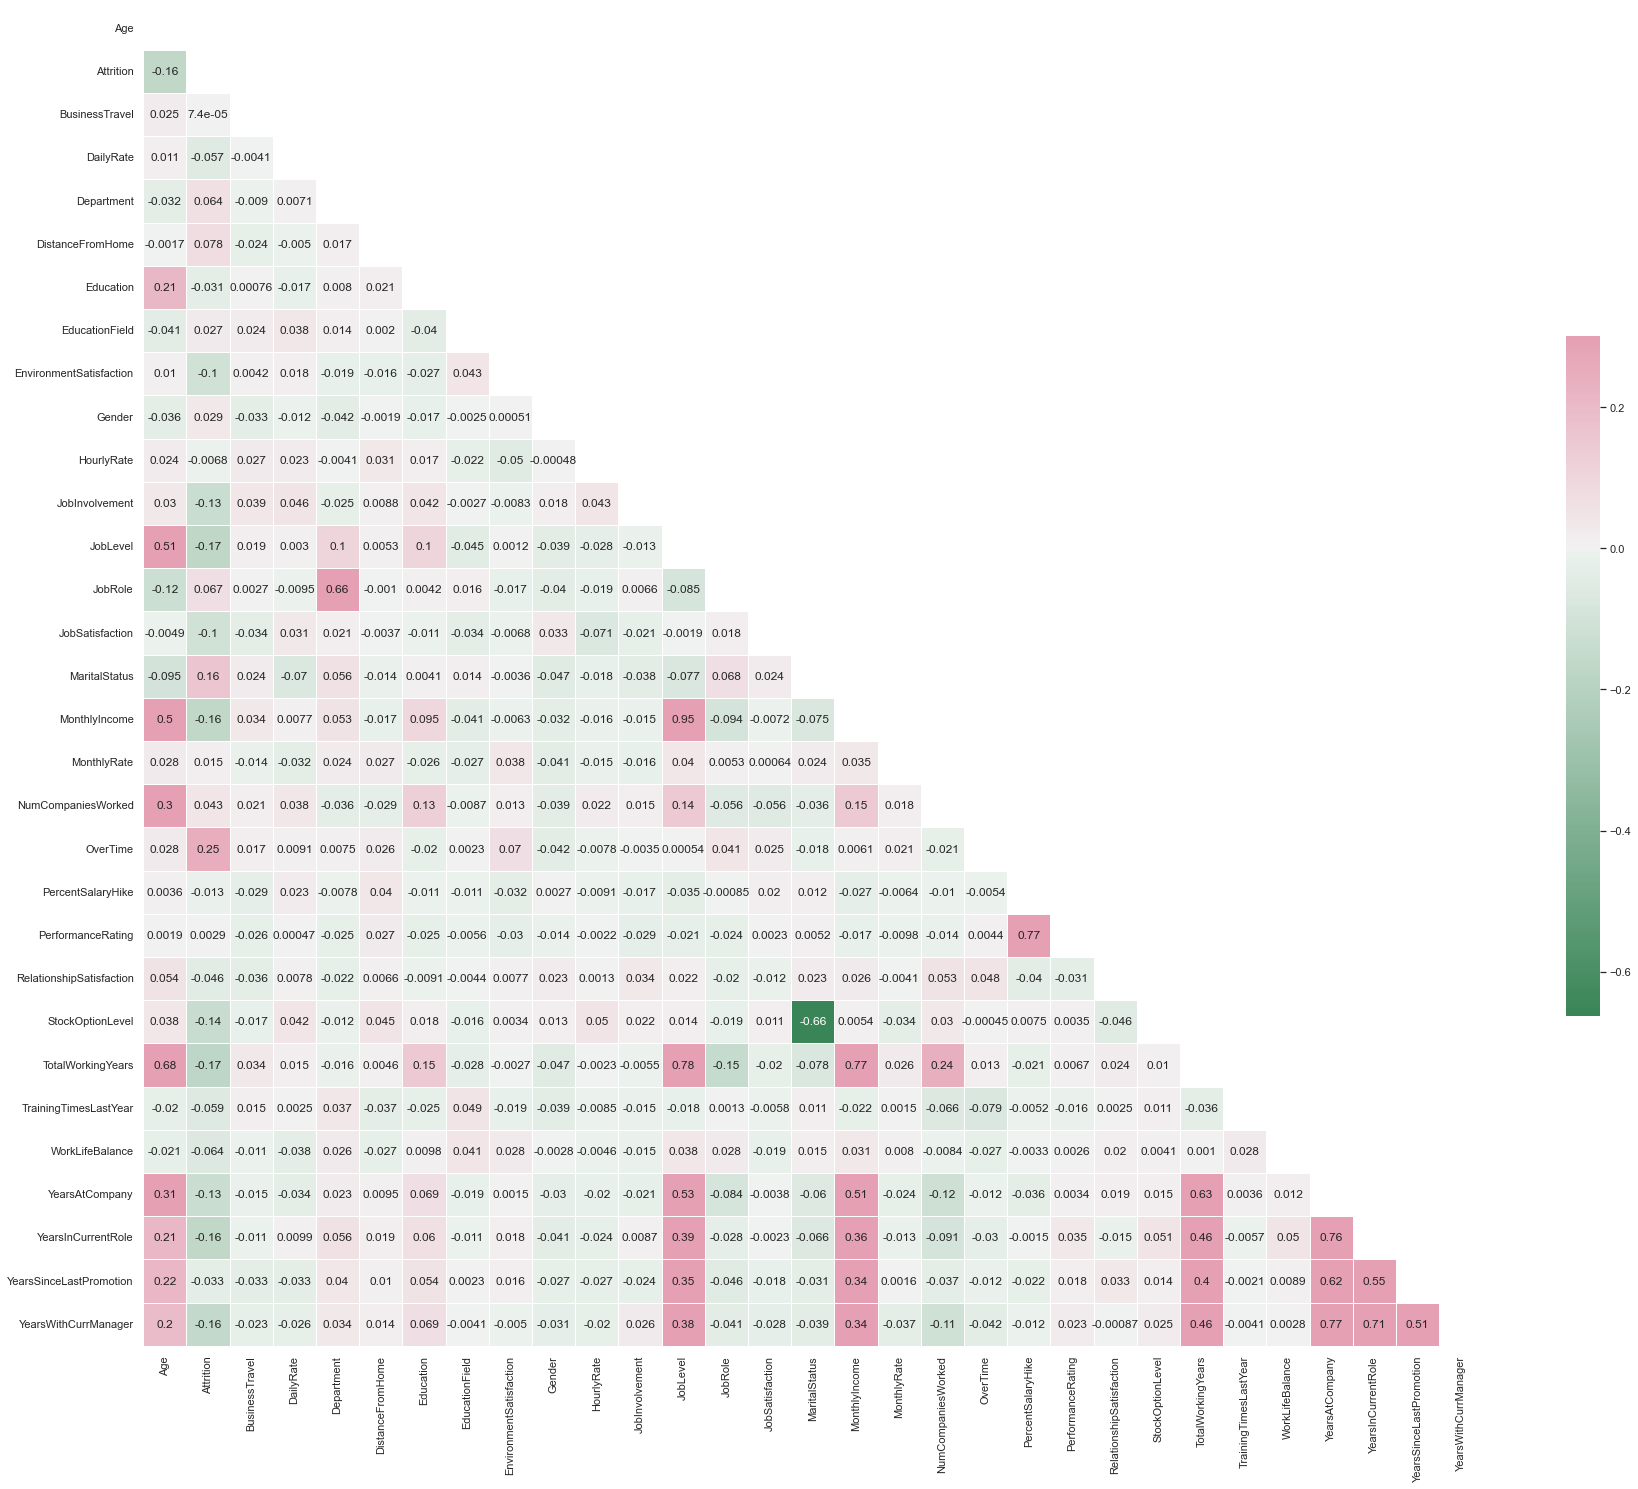

In [55]:
#Checking feature correlation using heatmap
sns.set_theme(style = 'white')
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize = (30,25))
cmap = sns.diverging_palette(500,1, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
           square = True, linewidths = .5, cbar_kws = {'shrink': .5}, annot = True)

plt.show()

# Skewness

In [56]:
#Checking skewness of the dataset
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

* Many features are showing skewed which needs to be treated.

# Remove Skewness using Z score method

In [57]:
z = np.abs(zscore(data))
threshold = 3
np.where(z > 3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
        29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
        27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
        24

In [58]:
new_data = data[(z < 3).all(axis = 1)]

In [59]:
new_data.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [60]:
new_data.shape

(1387, 31)

In [61]:
data.shape

(1470, 31)

In [62]:
#Printing data loss after removing skewness
data_loss = (1470 - 1387)/1470 * 100
print('Data loss percentage after removing outliers: ', data_loss)

Data loss percentage after removing outliers:  5.646258503401361


* 5.6% data has been removed while removing outliers using Z score method.

# Devide dataset into X and Y variable

In [63]:
x = new_data.drop(columns = 'Attrition')
y = new_data['Attrition']

In [64]:
x.shape

(1387, 30)

In [65]:
y.shape

(1387,)

# Scaling x data

In [66]:
#Scaling data using standrd scaler
sc = StandardScaler()
scaled = sc.fit_transform(x)

In [67]:
scaled

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.04090327,
        -0.71069889,  0.36826963],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  0.96589518,
        -0.31047991,  0.9821999 ],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -1.19241928,
        -0.71069889, -1.16655603],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ..., -0.575758  ,
        -0.71069889, -0.24566063],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.65756454,
        -0.71069889,  1.28916503],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.26742737,
        -0.31047991, -0.55262577]])

# Checking multicollinearity problem using VIF

In [68]:
#Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

#Let's check values
vif

,vif,features
0,1.850568,Age
1,1.014106,BusinessTravel
2,1.029494,DailyRate
3,2.062034,Department
4,1.019457,DistanceFromHome
5,1.061558,Education
6,1.021559,EducationField
7,1.021370,EnvironmentSatisfaction
8,1.023993,Gender
9,1.022001,HourlyRate


* Job Level VIF score is showing more than 5 hence I will remove that column and check VIF again.

In [69]:
#Droping Total Volume column
x = x.drop(columns = ['JobLevel'])

#Scaling x data after removing column ER
scaled = sc.fit_transform(x)

#Finding Variance inflation factor in each scaled column i.e. x_scaled.shape[1](1/1-R2)
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(scaled,i) for i in range(scaled.shape[1])]

vif['features'] = x.columns

vif

,vif,features
0,1.849565,Age
1,1.013202,BusinessTravel
2,1.028402,DailyRate
3,1.941548,Department
4,1.015830,DistanceFromHome
5,1.061164,Education
6,1.020639,EducationField
7,1.019817,EnvironmentSatisfaction
8,1.023217,Gender
9,1.020096,HourlyRate


* Multicollinearity problem has been resolved now.

# Will remove skewness using Power Transformer

In [70]:
#Will remove remaining skewness by using Power Tranform
PT = PowerTransformer(method = 'yeo-johnson')
new_df = PT.fit_transform(x)

In [71]:
new_df = pd.DataFrame(new_df)
new_df.columns = x.columns

In [72]:
new_df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
Y

* Skewness have been removed from the dataset.

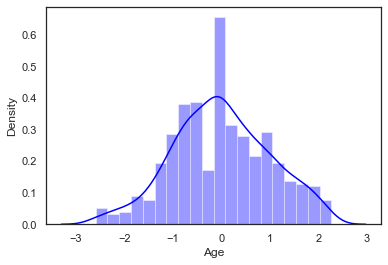

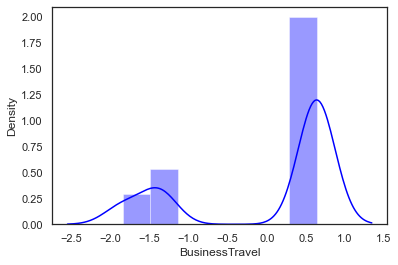

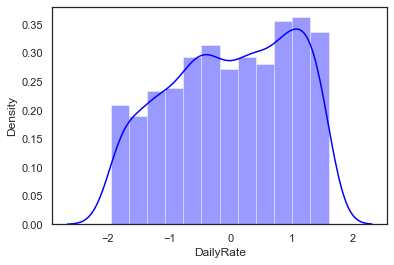

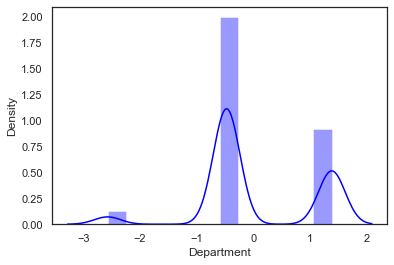

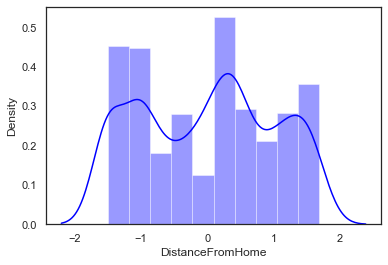

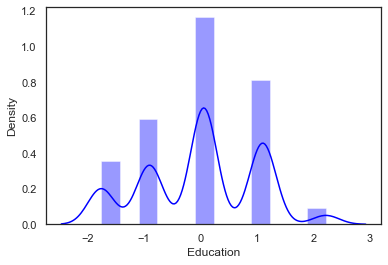

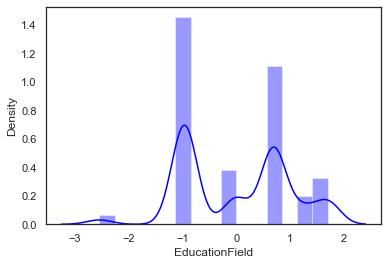

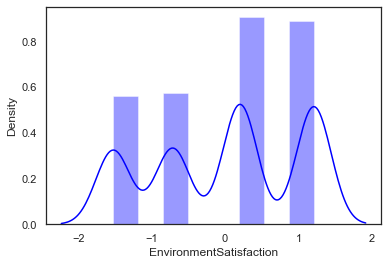

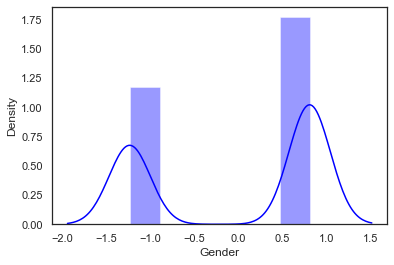

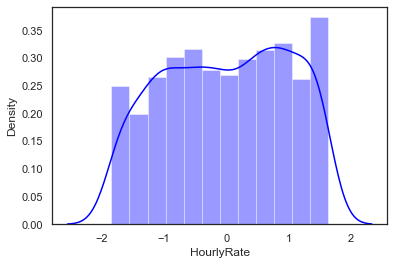

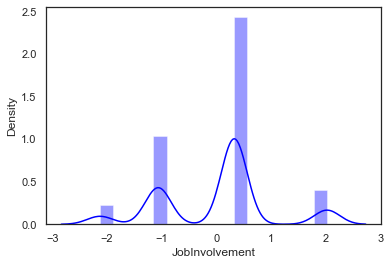

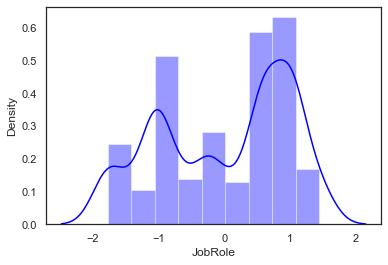

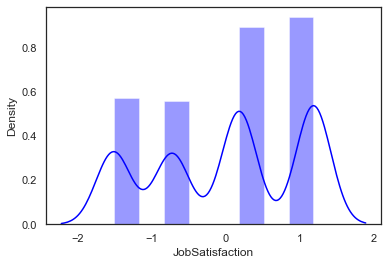

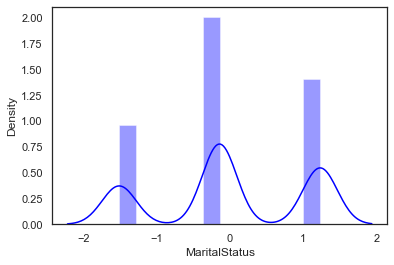

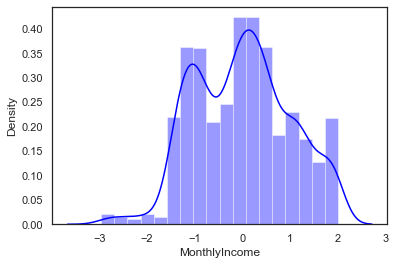

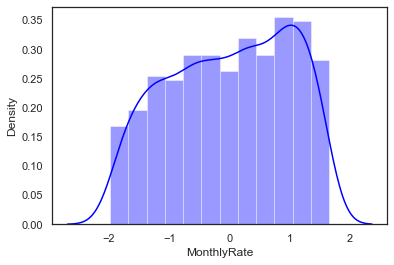

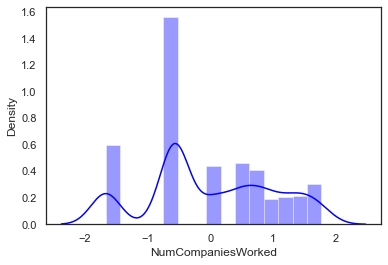

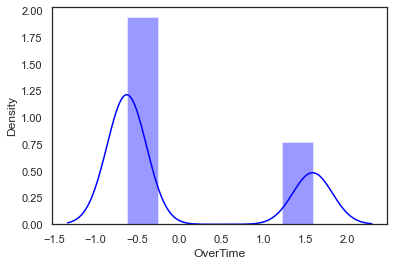

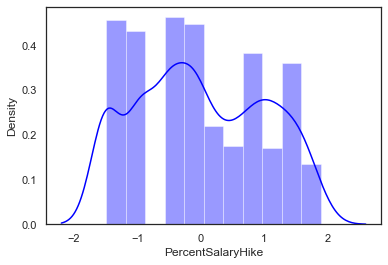

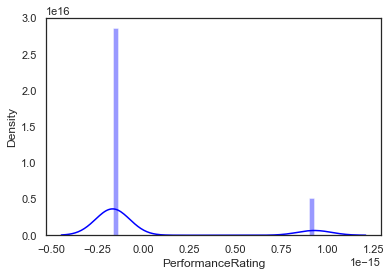

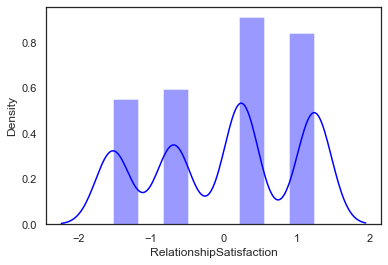

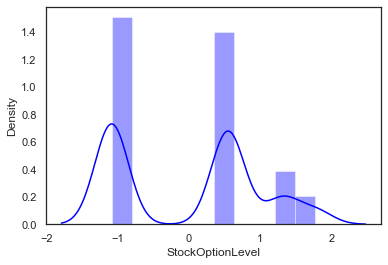

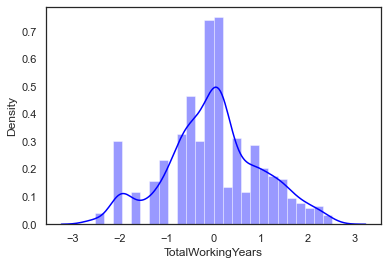

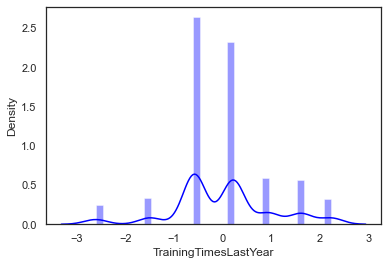

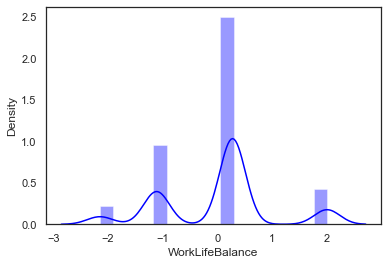

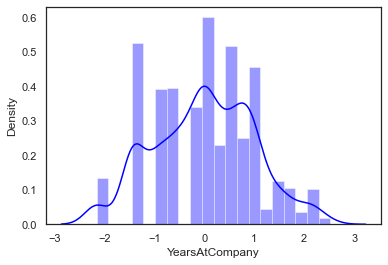

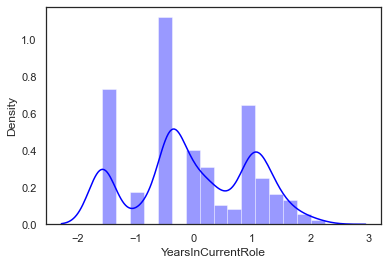

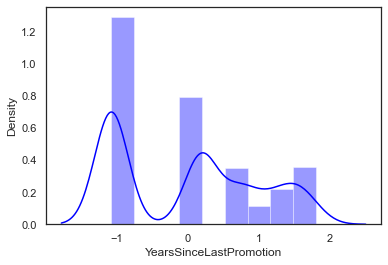

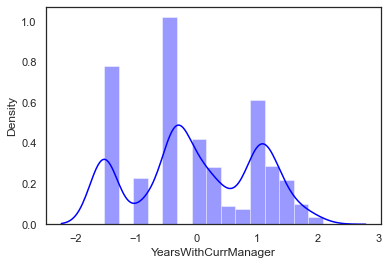

In [73]:
#Checking data distribution after removing skewness.
for i in new_df.columns:
    plt.figure()
    sns.distplot(new_df[i], color = 'blue')
    
plt.show()

* Data distribution is looking good.

# Balance Dataset

In [74]:
smt = SMOTE()
x,y = smt.fit_resample(new_df, y)

In [75]:
x.shape

(2316, 29)

In [76]:
y.shape

(2316,)

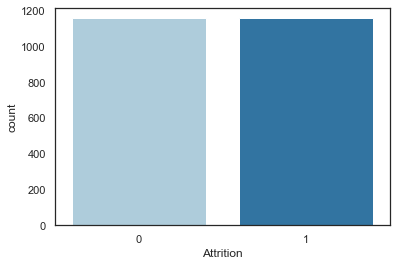

In [77]:
#Visualizing balanced dataset
sns.countplot(y, palette = 'Paired')
plt.show()

* Now dataset have been balanced.

# PCA - Principle Component Analysis

In [78]:
pca = PCA()
principle_comp = pca.fit_transform(x)

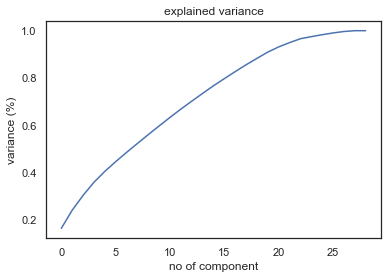

In [79]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

* Graph shows 21 components has explained 98% - 99% variance of all features, so will use 21.

In [80]:
pca = PCA(n_components = 21)

In [81]:
x = pca.fit_transform(x)

In [82]:
x

array([[ 0.76802859, -1.0396061 ,  1.88709804, ..., -0.44790336,
         0.11121411, -0.06075237],
       [ 1.95143671, -0.27919508, -0.76332225, ..., -0.86952818,
        -1.26286353, -0.45553539],
       [-2.74024951,  1.2410119 ,  0.75422481, ..., -0.71598991,
         0.74739002,  0.27005318],
       ...,
       [-0.77333461,  3.1116891 ,  1.00194687, ..., -0.55983388,
        -0.46678851, -0.8089696 ],
       [-0.83551112,  0.49598059,  0.21845618, ...,  0.99009796,
        -0.33854432,  0.30614376],
       [-1.11151942, -0.52263072,  0.58734228, ..., -0.09511535,
         0.21379503,  0.68110071]])

In [83]:
#Find best Random_state

maxaccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x, y, random_state = i,test_size = 0.2)
    LR =  LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        maxRS = i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8318965517241379 on Random State = 75


In [84]:
#Training model
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 75)

In [85]:
LR_model = LogisticRegression()
RD_model = RidgeClassifier()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
XGB_model = XGBClassifier()
SGH_model = SGDClassifier()
Bag_model = BaggingClassifier()
ADA_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()

model = [LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model]

In [86]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred = m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred) * 100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 83.1896551724138
Confusion Matrix of  LogisticRegression()  is 
 [[206  37]
 [ 41 180]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       243
           1       0.83      0.81      0.82       221

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464

**************************************************
Accuracy_Score of  RidgeClassifier() is 83.1896551724138
Confusion Matrix of  RidgeClassifier()  is 
 [[204  39]
 [ 39 182]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       243
           1       0.82      0.82      0.82       221

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464

***************************************

In [87]:
#Checking Cross Validation
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i, x, y, cv = 5, scoring = 'accuracy').mean() * 100)
    print('*' * 50)

Accuracy_Score of  LogisticRegression() is 83.1896551724138
cross Validation accuracy score of  LogisticRegression()  is  79.8798130632308
**************************************************
Accuracy_Score of  RidgeClassifier() is 83.1896551724138
cross Validation accuracy score of  RidgeClassifier()  is  80.05250614433605
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 82.32758620689656
cross Validation accuracy score of  DecisionTreeClassifier()  is  80.31038206598645
**************************************************
Accuracy_Score of  SVC() is 92.88793103448276
cross Validation accuracy score of  SVC()  is  90.50243911521561
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 81.46551724137932
cross Validation accuracy score of  KNeighborsClassifier()  is  81.99523348476949
**************************************************
Accuracy_Score of  RandomForestClassifier() is 94.61206896551724
cr

* Random Forest Classifier has given the best performance in all models.

# Next will check ROC AUC curve for the fitted model

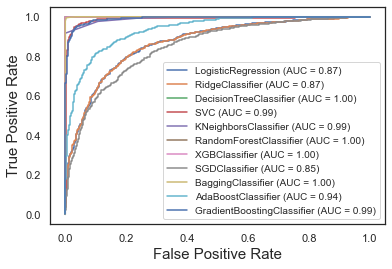

In [89]:
#Let's see how well our model works on training data.
disp = plot_roc_curve(LR_model,x_train,y_train)

plot_roc_curve(RD_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(DT_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SV_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(KNR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(RFR_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(XGB_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(SGH_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(Bag_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(ADA_model, x_train, y_train, ax = disp.ax_)

plot_roc_curve(GB_model, x_train, y_train, ax = disp.ax_)

plt.legend(prop = {'size': 10}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

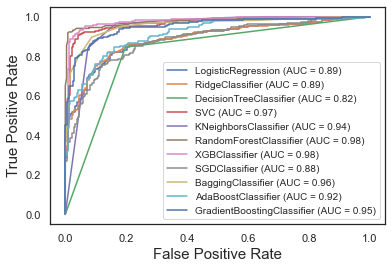

In [90]:
#Let's see how well our model works on training data.
disp = plot_roc_curve(LR_model, x_test, y_test)

plot_roc_curve(RD_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(DT_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SV_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(KNR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(RFR_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(XGB_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(SGH_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(Bag_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(ADA_model, x_test, y_test, ax = disp.ax_)

plot_roc_curve(GB_model, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size': 10}, loc = 'lower right')

plt.xlabel("False Positive Rate", fontsize = 15)

plt.ylabel("True Positive Rate", fontsize = 15)

plt.show()

# Hyper Tuning Random Forest Classifier

In [91]:
#Let's tune the parameters using GridSearchCV
params = {
    'n_estimators':[13,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(RFR_model, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [92]:
RFR_model = grd.best_estimator_
RFR_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [93]:
#Model Confidence/Accuracy

def metric_score(RFR_model,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = RFR_model.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = RFR_model.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [94]:
#Call the function and pass dataset to check train and test score.
metric_score(RFR_model,x_train,x_test,y_train,y_test,train = True)
metric_score(RFR_model,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 98.49%

====================================Test Result================================
Accurancy Score: 88.79%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89       243
           1       0.89      0.87      0.88       221

    accuracy                           0.89       464
   macro avg       0.89      0.89      0.89       464
weighted avg       0.89      0.89      0.89       464



# I have successfully tuned the model as accuracy have been imroved.

In [97]:
#Saving the best model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(RFR_model, open('HR_model', 'wb'))

In [98]:
#Loading saved model
loaded_model = pickle.load(open('HR_model','rb'))

In [99]:
HR = loaded_model.predict(x_test)
HR

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [100]:
#Creating a DataFrame to showcase Actual vs Predicted numbers.
HRA = pd.DataFrame({'Actual Attrition': y_test, 'Predicted Attrition': HR})
HRA.head()

,Actual Attrition,Predicted Attrition
1595,1,1
989,0,0
340,0,0
1335,0,0
520,0,0


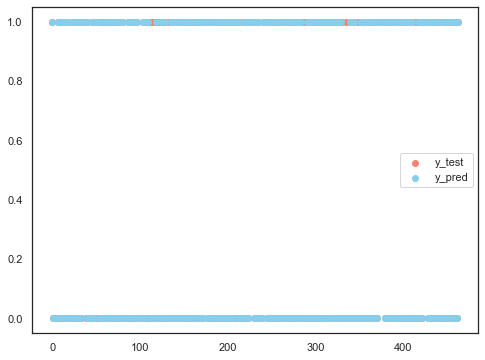

In [102]:
#Visualize Actual vs Predicted Attrition
fig = plt.figure(figsize = (8,6))
plt.scatter(range(y_test.shape[0]), y_test, color = "salmon", label ="y_test")
plt.scatter(range(y_test.shape[0]), HR, color = "skyblue", label = "y_pred")
plt.legend();